In [151]:
#lib for extraction ,manipulation,analysis
import numpy as np
import pandas as pd
# for visualtion
import matplotlib.pyplot as plt
import seaborn as sns
# for stats
import scipy.stats 
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore
# for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# train test split
from sklearn.model_selection import train_test_split
# Linear regression
from sklearn.linear_model import LinearRegression, Lasso,Ridge
# regression evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [152]:
# importing dataset 
data=pd.read_csv(r"C:\Users\deshm\OneDrive\Desktop\ML\03-LinearRegression\mediclaim.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [153]:
#EDA for each data analysis 
def eda(data):
    print("Shape:",data.shape)
    print("- "*50)
    print("Size:",data.size)
    print("- "*50)
    print("INFO:",data.info)
    print("- "*50)
    print("Describe:",data.describe())
    print("- "*50)
    print("Dtype:",data.dtypes)
    print("* "*50)
    print("Checking Null Values:",data.isnull().sum())

eda(data)

Shape: (1338, 7)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Size: 9366
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INFO: <bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.9

In [154]:
# Analysis for Numerical Columns
def Num_col(data, col):
    mean=data[col].mean()
    median=data[col].median()
    mode=data[col].mode()[0]
    var =data[col].var()
    std=data[col].std()
    skew=data[col].skew()
    Min=data[col].min()
    Max=data[col].max()
    Range=Max-Min
    print("Numerical Columns Analysis:")
    print(f"mean:{mean}\nmedian:{median}\nmode:{mode}\nvar:{var}\nstd:{std}\nskew:{skew}\nMIN:{Min}\nMAAX:{Max}\nRange:{Range}")


In [155]:
Num_col(data, "age")

Numerical Columns Analysis:
mean:39.20702541106129
median:39.0
mode:18
var:197.40138665754424
std:14.049960379216172
skew:0.05567251565299186
MIN:18
MAAX:64
Range:46


In [156]:
Num_col(data, "bmi")

Numerical Columns Analysis:
mean:30.66339686098655
median:30.4
mode:32.3
var:37.187883609773266
std:6.098186911679017
skew:0.2840471105987448
MIN:15.96
MAAX:53.13
Range:37.17


In [157]:
Num_col(data, "children")

Numerical Columns Analysis:
mean:1.0949177877429
median:1.0
mode:0
var:1.4532127456668944
std:1.2054927397819095
skew:0.9383804401702414
MIN:0
MAAX:5
Range:5


In [158]:
Num_col(data, "charges")

Numerical Columns Analysis:
mean:13270.422265141257
median:9382.033
mode:1639.5631
var:146652372.1528548
std:12110.011236693994
skew:1.5158796580240388
MIN:1121.8739
MAAX:63770.42801
Range:62648.554110000005


In [159]:
def Checking_and_Handling_Of_Outliers(data, col):
    sns.boxplot(data[col], color = "Red")
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = data[(data[col] < LowerTail) | (data[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)

    #HAndling of Outliers :
    data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    data.loc[data[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value
    print("After handling of Outliers data:\n")
    print(data.head())

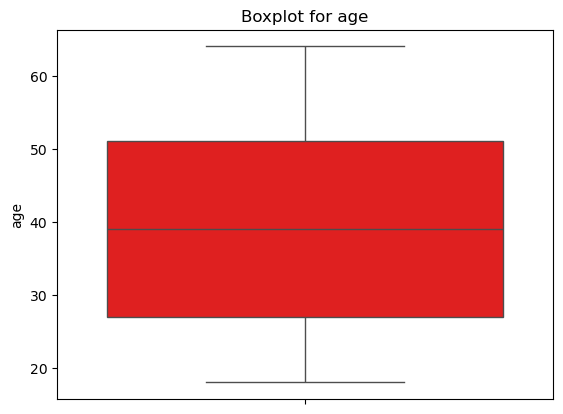

25% Quantile q1 = 27.0
75% Quantile q3 = 51.0
IQR = 24.0

--------------------------------------------------------------------------------
Lower Tail = -9.0
Upper Tail = 87.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [160]:
Checking_and_Handling_Of_Outliers(data, "age")

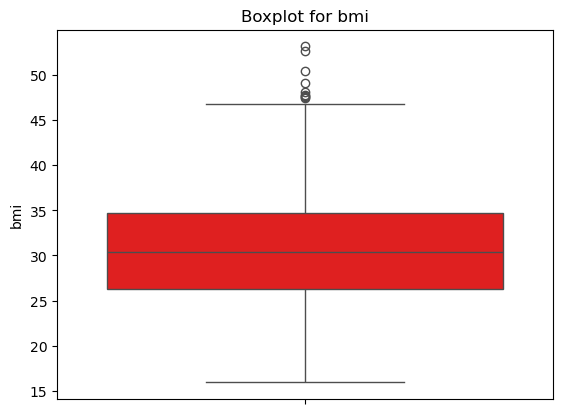

25% Quantile q1 = 26.29625
75% Quantile q3 = 34.69375
IQR = 8.3975

--------------------------------------------------------------------------------
Lower Tail = 13.7
Upper Tail = 47.290000000000006
--------------------------------------------------------------------------------

Outliers :
       age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270
-----------------------------------------------

In [161]:
Checking_and_Handling_Of_Outliers(data, "bmi")

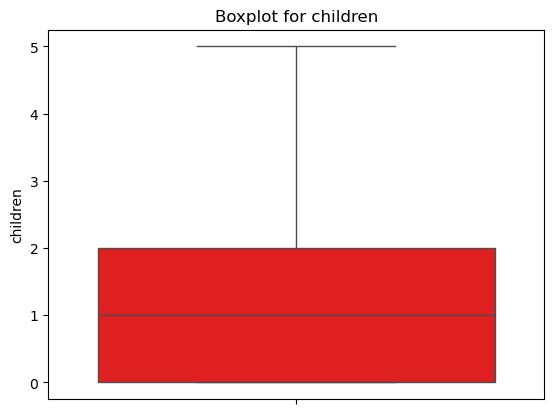

25% Quantile q1 = 0.0
75% Quantile q3 = 2.0
IQR = 2.0

--------------------------------------------------------------------------------
Lower Tail = -3.0
Upper Tail = 5.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [162]:
Checking_and_Handling_Of_Outliers(data, "children")

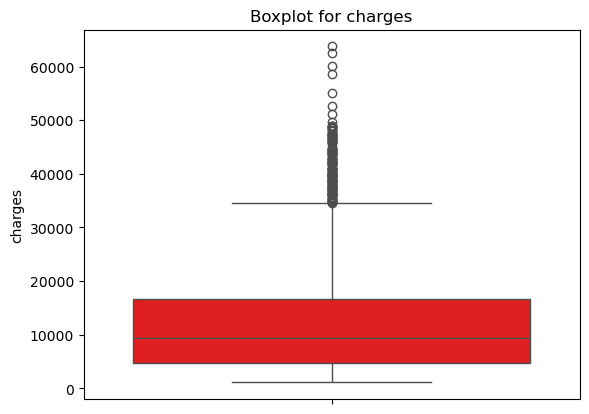

25% Quantile q1 = 4740.28715
75% Quantile q3 = 16639.912515
IQR = 11899.625365

--------------------------------------------------------------------------------
Lower Tail = -13109.1508975
Upper Tail = 34489.350562499996
--------------------------------------------------------------------------------

Outliers :
       age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  fema

In [163]:
Checking_and_Handling_Of_Outliers(data, "charges")

In [164]:
# Analysis of Categorical Columns(Variable)
def Cat_col(data, col):
    unique_values = data[col].unique()  # Fixed typo: renamed to unique_values
    value_counts = data[col].value_counts()
    mode = data[col].mode()[0]  # Fixed mode access by adding parentheses

    # Enhanced string formatting for clarity
    print(f"Unique Values in '{col}':\n{unique_values}\n")
    print(f"Value Counts in '{col}':\n{value_counts}\n")
    print(f"Mode of '{col}': {mode}\n")


    data[col].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(f"data-{col} (pie chart)")
    plt.show

In [165]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Unique Values in 'sex':
['female' 'male']

Value Counts in 'sex':
sex
male      676
female    662
Name: count, dtype: int64

Mode of 'sex': male



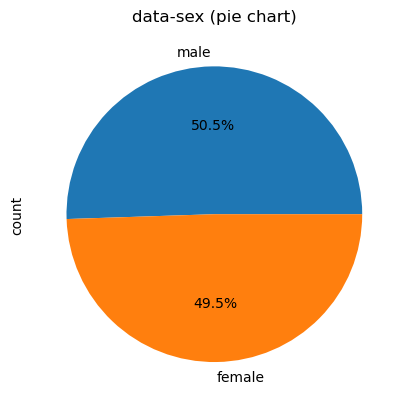

In [166]:
Cat_col(data, "sex")

Unique Values in 'smoker':
['yes' 'no']

Value Counts in 'smoker':
smoker
no     1064
yes     274
Name: count, dtype: int64

Mode of 'smoker': no



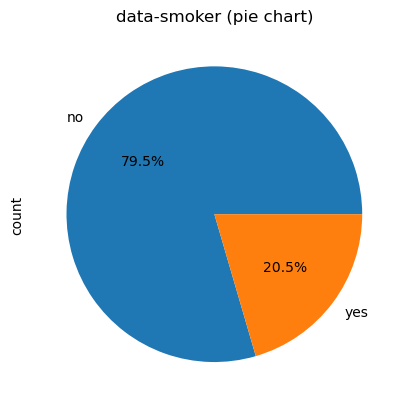

In [167]:
Cat_col(data, "smoker")

Unique Values in 'region':
['southwest' 'southeast' 'northwest' 'northeast']

Value Counts in 'region':
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Mode of 'region': southeast



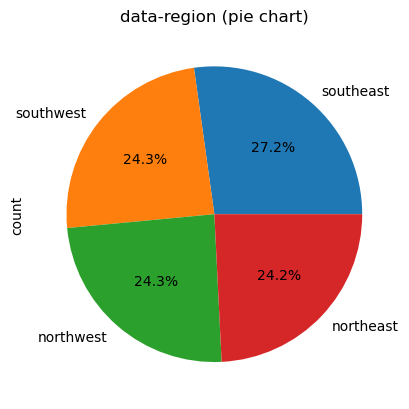

In [168]:
Cat_col(data, "region")

In [169]:
# Bivariate analysis of columns
def bivariate_violin_plot(data, categorical_col, numerical_col):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=categorical_col, y=numerical_col, data=data, palette="muted", inner="quartile")
    plt.title(f'Violin Plot: {numerical_col} by {categorical_col}', fontsize=16)
    plt.xlabel(categorical_col, fontsize=12)
    plt.ylabel(numerical_col, fontsize=12)
    plt.show()


C:\Users\deshm\AppData\Local\Temp\ipykernel_2704\3790340880.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_col, y=numerical_col, data=data, palette="muted", inner="quartile")


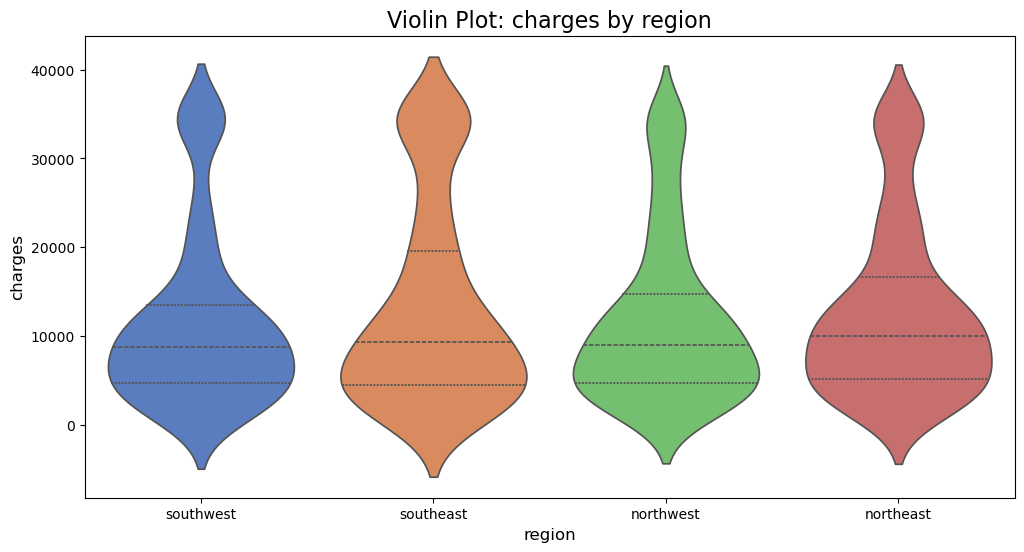

In [170]:
bivariate_violin_plot(data, "region", "charges")

In [171]:
# Encoding 
 
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [172]:
data["sex_encoded"]=data["sex"].replace({'female':0, 'male':1})

C:\Users\deshm\AppData\Local\Temp\ipykernel_2704\3863865108.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["sex_encoded"]=data["sex"].replace({'female':0, 'male':1})


In [173]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [174]:
data["smoker_encoded"]=data["smoker"].replace({'yes':0, 'no':1})

C:\Users\deshm\AppData\Local\Temp\ipykernel_2704\3939261919.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["smoker_encoded"]=data["smoker"].replace({'yes':0, 'no':1})


In [175]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [176]:
data["region_encoded"]=data["region"].replace({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

C:\Users\deshm\AppData\Local\Temp\ipykernel_2704\1909166453.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["region_encoded"]=data["region"].replace({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})


In [177]:
data.drop(columns=["sex"],inplace=True)
data.drop(columns=["smoker"],inplace=True)
data.drop(columns=["region"],inplace=True)

In [178]:
data

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,1,2
1334,18,31.920,0,2205.98080,0,1,3
1335,18,36.850,0,1629.83350,0,1,1
1336,21,25.800,0,2007.94500,0,1,0


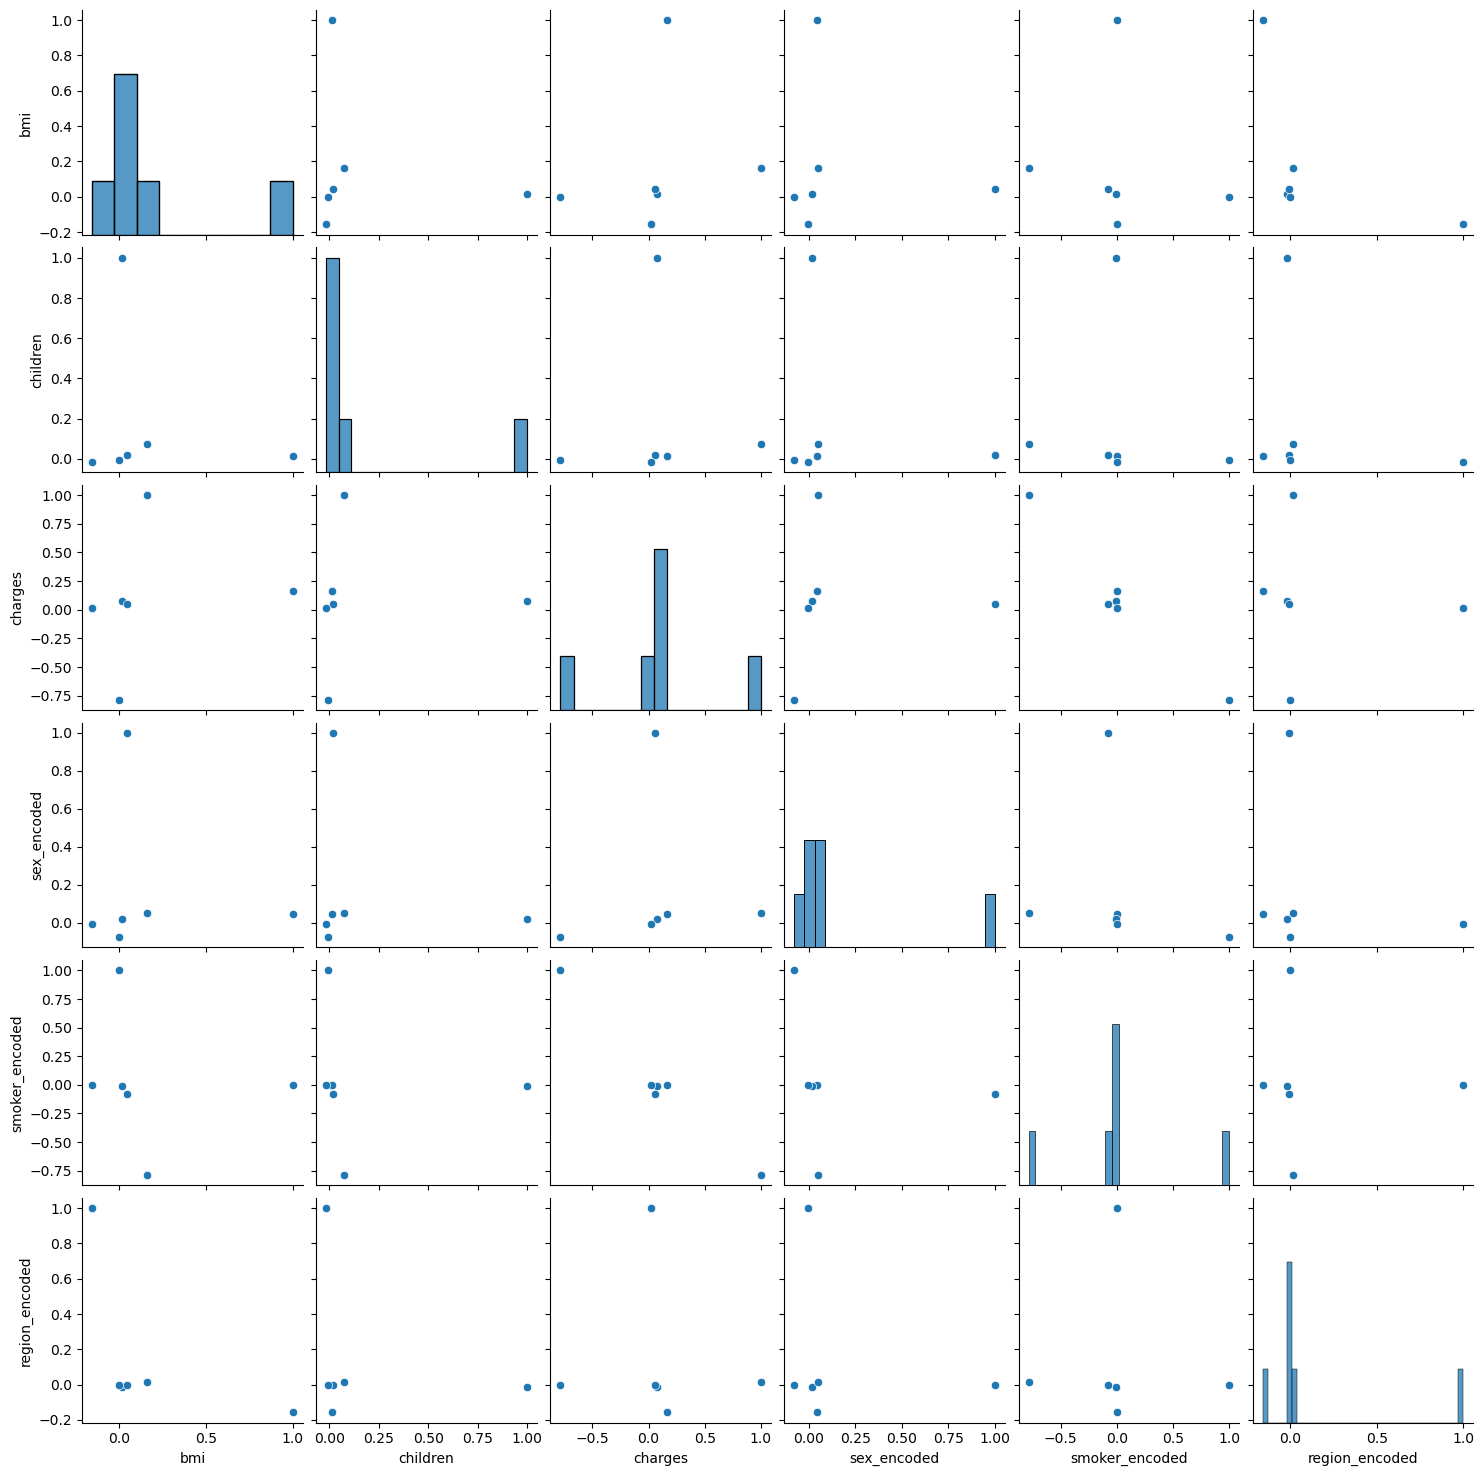

In [179]:
corr=data.iloc[:,1:8].corr()
sns.pairplot(corr)

In [180]:
# Train-test split

X = data.drop(columns=['charges'])  # Replace 'target_column' with your target variable
Y = data['charges']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=42)

print(f'Shape of X_train: {xtrain.shape}')
print(f'Shape of X_test: {xtest.shape}')
print(f'Shape of y_train: {ytrain.shape}')
print(f'Shape of y_test: {ytest.shape}')

Shape of X_train: (1003, 6)
Shape of X_test: (335, 6)
Shape of y_train: (1003,)
Shape of y_test: (335,)


## ML Model Training

In [182]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [183]:
lin_reg_model = lin_reg.fit(xtrain,ytrain) # linear regression working, bfl, cost, gradient descent
lin_reg_model

LinearRegression()

In [184]:
ytrain_pred = lin_reg_model.predict(xtrain)
ytrain_pred

array([ 3016.17380033,  5180.34750712, 12707.96514625, ...,
       11448.39181563, 31507.89919888, 11000.5053457 ])

In [185]:
# Ensure consistent lengths
print("------------------------- Evaluation for Training Data -------------------------")
print("Shape of ytrain:", ytrain.shape)
print("Shape of ytrain_pred:", ytrain_pred.shape)

# Recompute predictions if necessary
if len(ytrain) != len(ytrain_pred):
    ytrain_pred = ytrain_pred[:len(ytrain)]

# Calculate MSE
mse = mean_squared_error(ytrain, ytrain_pred)
print("Mean Squared Error (MSE):", mse)
print("-" * 80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
Shape of ytrain: (1003,)
Shape of ytrain_pred: (1003,)
Mean Squared Error (MSE): 26162370.951339696
--------------------------------------------------------------------------------
mean absolute error (MAE) :  3346.360391711921
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  5114.916514601162
--------------------------------------------------------------------------------
R2 Score :  0.7434776049643312
--------------------------------------------------------------------------------


In [186]:
ytest_pred = lin_reg_model.predict(xtest)
ytest_pred

array([ 9336.84134219,  7305.55652027, 32829.43460237,  9728.26767656,
       23557.46581852,  9532.63066135,  1692.8228067 , 15446.45811413,
        2848.20365207, 11087.73846789, 24998.88123828,  9288.50796245,
        5716.57831586, 33038.43272113, 34743.77112931, 32096.96890174,
       13684.57022334, 31260.74817834,  9269.87475494, 28006.92562062,
        4718.53566847,  9648.92588828,  2847.19105337,  6596.73755658,
       11272.02930014, 12323.04621164, 13417.12864002,  6509.36221589,
       10120.58320388,  2836.60959399,  9082.43811341, 12539.04220522,
        4686.93299424,  4818.95326244,  4758.31016028, 11794.10344382,
        2874.8468731 ,  8723.90687444, 29841.12623571, 28324.64864922,
        4495.23886739,  4703.63709011, 13052.62833026, 11464.66547311,
        8347.97068685, 11767.31874966,  5472.24321934,  4104.657937  ,
       30896.85391013,  8489.78023707, 14657.54468937,  3055.98117503,
       11214.46327831,  2478.96394981, 12539.83561298, 11979.64385661,
      

In [187]:
# for Testing

print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  25663562.89341267
--------------------------------------------------------------------------------
mean absolute error (MAE) :  3400.935136082026
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  5065.9217219981465
--------------------------------------------------------------------------------
R2 Score :  0.7589437714409245
--------------------------------------------------------------------------------


### Algorithm 2: L1- Lasso

In [194]:
Lasso_model=Lasso()
Lasso_model

Lasso()

In [196]:
# Training the Lasso model
lasso_model = Lasso_model.fit(xtrain, ytrain)
ytrain_pred = lasso_model.predict(xtrain)

print("------------------------- Evaluation of Lasso Training Data -------------------------")
mse_train = mean_squared_error(ytrain, ytrain_pred)
print("Mean Squared Error (MSE):", mse_train)
print("-" * 80)

mae_train = mean_absolute_error(ytrain, ytrain_pred)
print("Mean Absolute Error (MAE):", mae_train)
print("-" * 80)

rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("-" * 80)

r2_train = r2_score(ytrain, ytrain_pred)
print("R2 Score:", r2_train)
print("-" * 80)

------------------------- Evaluation of Lasso Training Data -------------------------
Mean Squared Error (MSE): 26162383.23163086
--------------------------------------------------------------------------------
Mean Absolute Error (MAE): 3346.9011439298597
--------------------------------------------------------------------------------
Root Mean Squared Error (RMSE): 5114.917715040083
--------------------------------------------------------------------------------
R2 Score: 0.743477484555913
--------------------------------------------------------------------------------


In [198]:
# Testing the Lasso model
ytest_pred = lasso_model.predict(xtest)

print("------------------------- Evaluation of Lasso Testing Data -------------------------")
mse_test = mean_squared_error(ytest, ytest_pred)
print("Mean Squared Error (MSE):", mse_test)
print("-" * 80)

mae_test = mean_absolute_error(ytest, ytest_pred)
print("Mean Absolute Error (MAE):", mae_test)
print("-" * 80)

rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("-" * 80)

r2_test = r2_score(ytest, ytest_pred)
print("R2 Score:", r2_test)
print("-" * 80)

------------------------- Evaluation of Lasso Testing Data -------------------------
Mean Squared Error (MSE): 25666205.392001774
--------------------------------------------------------------------------------
Mean Absolute Error (MAE): 3401.5554279432567
--------------------------------------------------------------------------------
Root Mean Squared Error (RMSE): 5066.18252651854
--------------------------------------------------------------------------------
R2 Score: 0.7589189506182465
--------------------------------------------------------------------------------


### Algorithm 3: L2 - Ridge

In [201]:
Ridge_model=Ridge()
Ridge_model

Ridge()

In [203]:
ridge_model=Ridge_model.fit(xtrain,ytrain)
ytrain_predict = Ridge_model.predict(xtrain)
ytrain_predict

array([ 3044.79386716,  5204.46305323, 12733.99715313, ...,
       11472.52680989, 31410.39392572, 11024.914144  ])

In [205]:
print("------------------------- Evaluation of ridge Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("Mean Squared Error (MSE):", mse)
print("-" * 80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("Mean Absolute Error (MAE):", mae)
print("-" * 80)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("-" * 80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score:", r2score)
print("-" * 80)


------------------------- Evaluation of ridge Training Data -------------------------
Mean Squared Error (MSE): 26162383.23163086
--------------------------------------------------------------------------------
Mean Absolute Error (MAE): 3346.9011439298597
--------------------------------------------------------------------------------
Root Mean Squared Error (RMSE): 5114.917715040083
--------------------------------------------------------------------------------
R2 Score: 0.743477484555913
--------------------------------------------------------------------------------


In [207]:
ytest_pred = Ridge_model.predict(xtest)
ytest_pred

print("------------------------- Ridge Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)
    
mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)
    
rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)
    
r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Ridge Evaluation for Testing Data -------------------------
mean squared error (MSE) :  25690567.648712225
--------------------------------------------------------------------------------
mean absolute error (MAE) :  3412.9725338121752
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  5068.586356047634
--------------------------------------------------------------------------------
R2 Score :  0.7586901174766364
--------------------------------------------------------------------------------
